Zero Vector Error: 0.5049752469181039
60 Best Error: 0.3921649164858179
190 Best Error: 0.38414105259184267
1292 Best Error: 0.30959242555017624
13572 Best Error: 0.24172262156200486
48498 Best Error: 0.2
120817 Best Error: 0.198056972061421
183853 Best Error: 0.1909620756461302
Best Error: 0.14956604412454888
Best Phi: [0.     0.     0.1135 0.     0.     0.     0.3446 0.086  0.     0.
 0.     0.     0.     0.     0.     0.     0.2638 0.     0.     0.
 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.    ]


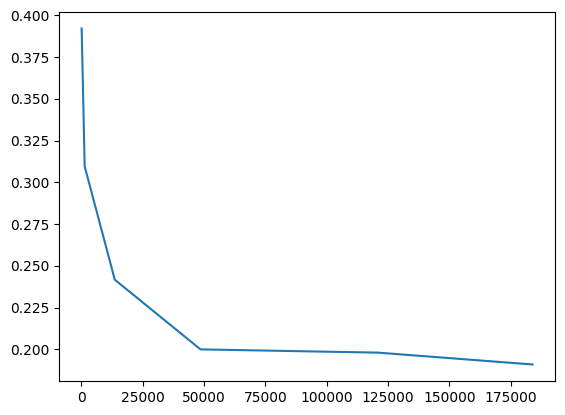

In [160]:
import numpy as np
import matplotlib.pyplot as plt

array = [
    [0.9206, 0, 0, 0, 0, 0, 0.9206, 0, 0, 0, 0.6406, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0.9206, 0, 0, 0, 0, 0, 0.9206, 0, 0, 0, 0.6406, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.07943, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0.9206, 0, 0, 0, 0, 0, 0.9206, 0, 0, 0, 0.6406, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.07943, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0.9206, 0, 0, 0, 0, 0, 0.9206, 0, 0, 0, 0.6406, 0, 0, 0, 0.6406, 0, 0, 0, 0, 0, 0.07943, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0.9206, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.6406, 0, 0, 0, 0.6406, 0, 0, 0, 0, 0, 0.07943, 0, 0, 0, 0, 0.07943],
    [0, 0, 0, 0, 0, 0.9206, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.6406, 0, 0, 0, 0.6406, 0.07943, 0, 0, 0, 0, 0.07943, 0, 0, 0.07943, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.6406, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.07943, 0.07943, 0, 0]
]

b = [0.4, 0.1, 0.2, 0.05, 0.05, 0, 0.2]

# Calculate the error for the zero vector
initial_phi = np.zeros(len(array[0]))
initial_b = np.dot(array, initial_phi)
error = np.linalg.norm(b - initial_b)
print("Zero Vector Error:", error)


# Initialize best phi and error
best_phi = initial_phi.copy()
best_error = error.copy()
error_values = []
sim_values = []

# Trying to solve for best phi using montecarlo
for sim in range(200_000):
    
    # Randomly initialize phi
    k= np.random.randint(4, 9)
    initial_phi = np.zeros(len(array[0]))
    random_indices = np.random.choice(len(initial_phi), k, replace=False)
    numbers = []
    numbers.append(np.random.uniform(0,0.5))
    random_max = np.random.uniform(0.95, 1)
    for _ in range(k-1):
           numbers.append(np.random.uniform(0, random_max - np.sum(numbers)))
    initial_phi[random_indices] = numbers

    # Calculate The Dot Product
    computed_b = np.dot(array, initial_phi)

    # Calculate the Error Term
    diff = b - computed_b # Expected to be positive
    penalty1 = 4*np.sum(diff[diff < 0])  # Only sum negative differences and apply penalty
    penalty2 = 12.5 * np.min(diff) if np.min(diff) < 0 else 0
    penalty3 = 2*np.max(diff) # Super normal penalty for the largest positive difference
    error =  -penalty1 - penalty2 + penalty3

    # Store the best phi and error
    if error< best_error:
        best_error = error.copy()
        best_phi= initial_phi.copy()
        error_values.append(error)
        sim_values.append(sim)
        print(sim, "Best Error:", best_error)



# Reevaluating the error
L2 = np.dot(array, best_phi)
error = np.linalg.norm(L2 - b)
print("Best Error:", error)
print("Best Phi:", np.round(best_phi, 4))

# Plotting the error values for each iteration
plt.plot(sim_values, error_values)


# Checking Excel Found Vertices

In [161]:
#best_phi = [0.0058, 0.0631, 0, 0.0541, 0, 0, 0.3964, 0, 0.1984, 0, 0,  0, 0, 0, 0, 0, 0.255,  0, 0.0144, 0, 0,  0,  0, 0, 0, 0, 0, 0,  0, 0]
array1 = [0.4345, 0.1086, 0.2173, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2396, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
array2 = [0, 0.1086, 0.2173, 0, 0, 0, 0.4345, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2396, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
# array 3 averages the two arrays
array3 = np.mean([array1, array2], axis=0)
b = [0.4, 0.1, 0.2, 0.05, 0.05, 0, 0.2]

print ('Given b     ', b)

vertices = [best_phi, array1, array2, array3]

for vertex in vertices:
    comp_b = np.dot(array, vertex)
    error = np.linalg.norm(b - comp_b)
    print("Calculated b", np.round(comp_b,3))
    print('Difference', np.round(b - comp_b,3))
    print(" Error:", error)

    print()

print('Best Phi:', np.round(best_phi,3))

Given b      [0.4, 0.1, 0.2, 0.05, 0.05, 0, 0.2]
Calculated b [0.317 0.079 0.105 0.    0.    0.    0.169]
Difference [0.083 0.021 0.095 0.05  0.05  0.    0.031]
 Error: 0.14956604412454888

Calculated b [0.4   0.1   0.2   0.    0.    0.    0.153]
Difference [-0.     0.    -0.     0.05   0.05   0.     0.047]
 Error: 0.08463681907466515

Calculated b [0.4   0.1   0.2   0.    0.    0.    0.153]
Difference [-0.     0.    -0.     0.05   0.05   0.     0.047]
 Error: 0.08463681907466515

Calculated b [0.4   0.1   0.2   0.    0.    0.    0.153]
Difference [-0.     0.    -0.     0.05   0.05   0.     0.047]
 Error: 0.08463681907466515

Best Phi: [0.    0.    0.114 0.    0.    0.    0.345 0.086 0.    0.    0.    0.
 0.    0.    0.    0.    0.264 0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.   ]


# Simulated Annealing Approach

Best Error: 0.3623355185404345 Temperature: 0.02
Best Error: 0.34748649915638824 Temperature: 0.02
Best Error: 0.3332229812956764 Temperature: 0.02
Best Error: 0.303583914532531 Temperature: 0.02
Best Error: 0.29468851093431025 Temperature: 0.02
Best Error: 0.28750490967915854 Temperature: 0.02
Best Error: 0.2871066380339397 Temperature: 0.019960000000000002
Best Error: 0.2847719559154656 Temperature: 0.019960000000000002
Best Error: 0.278404818255383 Temperature: 0.019960000000000002
Best Error: 0.2753530578513167 Temperature: 0.019960000000000002
Best Error: 0.2305726674439339 Temperature: 0.019960000000000002
Best Error: 0.19978062837006522 Temperature: 0.019960000000000002
Best Error: 0.18223366079351525 Temperature: 0.019960000000000002
Best Error: 0.18123258076125193 Temperature: 0.019960000000000002
Best Error: 0.177325118945721 Temperature: 0.019960000000000002
Best Error: 0.17421803105820927 Temperature: 0.019960000000000002
Best Error: 0.16566815408760305 Temperature: 0.01992

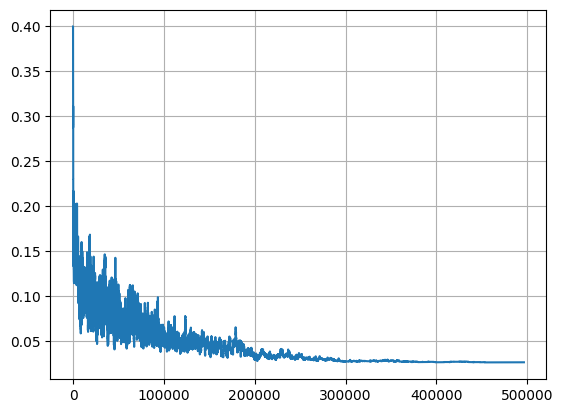

In [305]:
import numpy as np
import matplotlib.pyplot as plt


# Initial phi
#initial_phi = np.array([0.0058, 0.0631, 0, 0.0541, 0, 0, 0.3964, 0, 0.1984, 0, 0,  0, 0, 0, 0, 0, 0.255,  0, 0.0144, 0, 0,  0,  0, 0, 0, 0, 0, 0,  0, 0])
#initial_phi = best_phi.copy()
initial_phi = np.zeros(len(array[0]))
computed_b = np.dot(array, initial_phi)
initial_error = calculate_error(initial_phi)

# Simulated Annealing setup
best_phi = initial_phi.copy()
best_error = initial_error
current_phi = best_phi.copy()
current_error = best_error

# Parameters
T = 0.02  # Initial temperature
T_min = 0.00008  # Minimum temperature
alpha = 0.998  # Cooling rate
num_iterations = 180  # Iterations per temperature
iter = 0
counter = []
error_values = []

# Function to calculate the custom error
def calculate_error(phi):
    computed_b = np.dot(array, phi)
    diff = b - computed_b # Expected to be positive
    penalty1 = 4*np.sum(diff[diff < 0])  # Only sum negative differences and apply penalty
    penalty2 = 12.5 * np.min(diff) if np.min(diff) < 0 else 0
    penalty3 = 2*np.max(diff) # Super normal penalty for the largest positive difference
    #penalty4 = 0.01*np.linalg.norm(diff, ord=1)  # L1 norm penalty
    #penalty5 = 5*np.linalg.norm(diff, ord=2)  # L2 norm penalty
    penalties =  -penalty1 - penalty2 + penalty3 #+ penalty4 + penalty5
    return penalties

# Annealing process
while T > T_min:
    
    for i in range(num_iterations):
        iter += 1
        # Make a small change to phi
        new_phi = current_phi.copy()
        #index = np.random.randint(0, len(new_phi))
        index = np.random.randint(0, len(new_phi))
        change = np.random.uniform(-0.05, 0.05)  # Adjust magnitude of change as needed
        new_phi[index] += change
        new_phi[new_phi < 0] = 0  # Ensure non-negativity

        # Check if the sum constraint is violated
        if np.sum(new_phi) > 1:
            continue  # Skip the rest of the loop and do not update current_phi or current_error

        # Calculate new error
        new_error = calculate_error(new_phi)

        # Acceptance condition
        if new_error < current_error or np.random.uniform() < np.exp((current_error - new_error) / T):
            current_phi = new_phi
            current_error = new_error
            counter.append(iter)
            error_values.append(current_error/2)
            if new_error < best_error:
                best_error = new_error
                best_phi = new_phi
                print("Best Error:", best_error/2, "Temperature:", T)

    # Cool down
    T *= alpha

# Output results
print("Best Error:", best_error/2)
print("Best Phi:", np.round(best_phi, 3))

# Plotting the error values for each iteration

plt.plot(counter, error_values)
plt.grid()
plt.show()



In [309]:
#print("sum of best phi", np.sum(best_phi))
array1 = [0.4345, 0.1086, 0.2173, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2396, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
array2 = [0, 0.1086, 0.2173, 0, 0, 0, 0.4345, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.2396, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
array3 = np.array([0.1174, 0.0063, 0.0795, 0.0261, 0.0261, 0, 0.2889, 0.0742, 0.1096, 0, 0, 0, 0, 0, 0, 0, 0.2717, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0])
array4 = np.array([0.192, 0.058, 0.03,  0.008, 0.026, 0, 0.215, 0.022, 0.159, 0.018, 0, 0, 0, 0, 0, 0, 0.272, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
array5 = np.array([0,0, 0.045, 0.022, 0.026, 0, 0.406, 0.08, 0.144, 0.005, 0, 0, 0, 0, 0, 0, 0.272, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


print ('Given b     ', b)
print()

vertices = [best_phi, array1, array2, array3, array4, array5]

for vertex in vertices:
    comp_b = np.dot(array, vertex)
    #error = np.linalg.norm(b - comp_b)
    print("Calculated b", np.round(comp_b,4))
    print('Difference  ', np.round(b - comp_b,3))
    print('Superion Norm', np.max(b - comp_b))
    #print(" Error:", error)

    print()

print('Best Phi:', np.round(best_phi,3))

Given b      [0.4, 0.1, 0.2, 0.05, 0.05, 0, 0.2]

Calculated b [0.3741 0.0739 0.1744 0.024  0.0241 0.     0.1739]
Difference   [0.026 0.026 0.026 0.026 0.026 0.    0.026]
Superion Norm 0.02607656611838627

Calculated b [0.4    0.1    0.2    0.     0.     0.     0.1535]
Difference   [-0.     0.    -0.     0.05   0.05   0.     0.047]
Superion Norm 0.05

Calculated b [0.4    0.1    0.2    0.     0.     0.     0.1535]
Difference   [-0.     0.    -0.     0.05   0.05   0.     0.047]
Superion Norm 0.05

Calculated b [0.374  0.0741 0.1741 0.024  0.024  0.     0.1741]
Difference   [0.026 0.026 0.026 0.026 0.026 0.    0.026]
Superion Norm 0.025972340000000003

Calculated b [0.3747 0.0736 0.174  0.0239 0.0239 0.     0.1742]
Difference   [0.025 0.026 0.026 0.026 0.026 0.    0.026]
Superion Norm 0.026352000000000014

Calculated b [0.3738 0.0736 0.174  0.0249 0.0239 0.     0.1742]
Difference   [0.026 0.026 0.026 0.025 0.026 0.    0.026]
Superion Norm 0.026352

Best Phi: [0.097 0.001 0.189 0.026 0.02